In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("RTA_Anonymous_Journies.csv")

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272630 entries, 0 to 272629
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   StartDateTime          272630 non-null  object 
 1   StartLat               272630 non-null  float64
 2   StartLon               272630 non-null  float64
 3   EndDateTime            272630 non-null  object 
 4   EndLat                 272630 non-null  float64
 5   EndLon                 272630 non-null  float64
 6   Distance               272630 non-null  float64
 7   anonymized_vehicle_id  272630 non-null  object 
dtypes: float64(5), object(3)
memory usage: 16.6+ MB


(          StartDateTime   StartLat   StartLon           EndDateTime  \
 0  2024-03-12T00:00:00Z  25.281368  55.332993  2024-03-12T00:06:09Z   
 1  2024-03-12T00:00:00Z  25.254010  55.330334  2024-03-12T00:32:37Z   
 2  2024-03-12T00:00:00Z  25.270855  55.330566  2024-03-12T00:04:41Z   
 3  2024-03-12T00:00:01Z  25.270340  55.321148  2024-03-12T00:12:53Z   
 4  2024-03-12T00:00:00Z  25.185345  55.261173  2024-03-12T00:13:12Z   
 
       EndLat     EndLon  Distance  \
 0  25.272163  55.316063     2.236   
 1  25.003492  55.163070    41.466   
 2  25.277420  55.313810     2.345   
 3  25.256950  55.293510     7.088   
 4  25.240814  55.366875    16.542   
 
                                anonymized_vehicle_id  
 0  192d68997c90f9e4f8fff3261263919495cb478f87afc2...  
 1  4daee81583bcd87e31406019500503c6a107bfe14a85df...  
 2  3a9de8e9ab90d7d0af172c0a76904ac429335a6a3bdfa1...  
 3  9252c6c5b73eb70dc17a54c638cfd22df2e047ff3b009b...  
 4  7cccdc4f24376ede9e73b3f597c85ceb7597ab95498205...  ,

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the target variable:
# 1 for "long trip" (>=5 km)
# 0 for "short trip" (<5 km)
data['TripType'] = (data['Distance'] >= 5).astype(int)

# Select features and target
features = ['StartLat', 'StartLon', 'EndLat', 'EndLon', 'Distance']
target = 'TripType'

X = data[features]
y = data[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalize the features for better performance with SVM and k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], y_train[:5]  # Display some of the processed data


(array([[ 0.22766468,  0.01873081,  0.38274215,  0.0480166 , -0.66114883],
        [-0.35071134, -0.34875448, -0.60570663, -0.22850332, -0.36936732],
        [ 0.10089602,  0.57441149,  0.00830294,  0.48544424, -0.39607073],
        [ 0.00436806,  0.66865559,  0.08807218,  0.64376111, -0.54157879],
        [ 0.55558623,  0.41609926,  0.50271701,  0.09868013, -0.1639892 ]]),
 25091     0
 199785    1
 106141    1
 190441    1
 268680    1
 Name: TripType, dtype: int64)

In [4]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)       # Set a large display width
pd.set_option("display.max_colwidth", None)  # Make sure no columns are not cutoff
# Train an SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Train a k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors as default
knn_model.fit(X_train_scaled, y_train)

# Evaluate both models
svm_predictions = svm_model.predict(X_test_scaled)
knn_predictions = knn_model.predict(X_test_scaled)

# Generate classification reports
svm_report = classification_report(y_test, svm_predictions)
knn_report = classification_report(y_test, knn_predictions)

# Calculate accuracy scores
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("SVM classification report:")
print(svm_report)
print("k-nn classification report:")
print(knn_report)
print(f"SVM accuracy score: {svm_accuracy}")
print(f"k-nn accuracy score: {svm_accuracy}")


SVM classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26025
           1       1.00      1.00      1.00     55764

    accuracy                           1.00     81789
   macro avg       1.00      1.00      1.00     81789
weighted avg       1.00      1.00      1.00     81789

k-nn classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     26025
           1       1.00      0.99      0.99     55764

    accuracy                           0.99     81789
   macro avg       0.99      0.99      0.99     81789
weighted avg       0.99      0.99      0.99     81789

SVM accuracy score: 0.9992541784347528
k-nn accuracy score: 0.9992541784347528


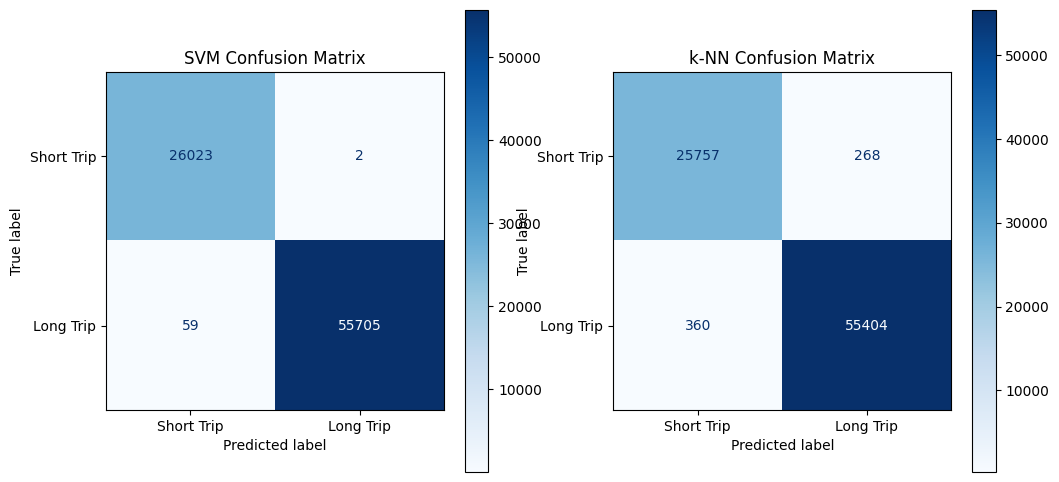

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrices for both models
svm_cm = confusion_matrix(y_test, svm_predictions)
knn_cm = confusion_matrix(y_test, knn_predictions)

# Create confusion matrix display for both models
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=['Short Trip', 'Long Trip'])
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=['Short Trip', 'Long Trip'])

# Plot the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots for two confusion matrices

# Plot the SVM confusion matrix
svm_disp.plot(cmap=plt.cm.Blues, ax=ax[0])
ax[0].set_title("SVM Confusion Matrix")

# Plot the k-NN confusion matrix
knn_disp.plot(cmap=plt.cm.Blues, ax=ax[1])
ax[1].set_title("k-NN Confusion Matrix")

# Show the plots
plt.show()